In [52]:
import symforce
symforce.set_epsilon_to_symbol()

import symforce.symbolic as sf
from symforce.notebook_util import display
from symforce.codegen import Codegen, CppConfig

def edge_residual(
    t: sf.V3, R: sf.Rot3, p: sf.V3, p1: sf.V3, p2: sf.V3, epsilon: sf.Scalar) -> sf.V3:
    p_w = R * p + t
    return (p_w - p1).cross(p_w - p2) / (p1 - p2).norm(epsilon=epsilon)

def edge_residual_better(
    t: sf.V3, R: sf.Rot3, p: sf.V3, p1: sf.V3, p2: sf.V3, epsilon: sf.Scalar) -> sf.V3:
    v = (p1 - p2) / (p1 - p2).norm(epsilon=epsilon)
    p_w = R * p + t
    p2_to_pw = p_w - p2
    return p2_to_pw - ((p2_to_pw).dot(v)) * v

def plane_residual(
    t: sf.V3, R: sf.Rot3, p: sf.V3, w: sf.V3, d: sf.V1, epsilon: sf.Scalar) -> sf.V3:
    p_w = R * p + t
    scale = -w.dot(p_w) + d[0]
    return scale * w

def edge_norm_residual(
    t: sf.V3, R: sf.Rot3, p: sf.V3, p1: sf.V3, p2: sf.V3, epsilon: sf.Scalar) -> sf.V1:
    return sf.V1(edge_residual(t, R, p, p1, p2, epsilon).norm(epsilon=epsilon))

def plane_norm_residual(
    t: sf.V3, R: sf.Rot3, p: sf.V3, w: sf.V3, d: sf.V1, epsilon: sf.Scalar) -> sf.V1:
    p_w = R * p + t
    return w.transpose() * p_w + d

t = sf.V3.symbolic("t")
R = sf.Rot3.symbolic("R")

p  = sf.V3().symbolic("p")
p1 = sf.V3().symbolic("p1")
p2 = sf.V3().symbolic("p2")

w = sf.V3().symbolic("w")
d = sf.V1().symbolic("d")

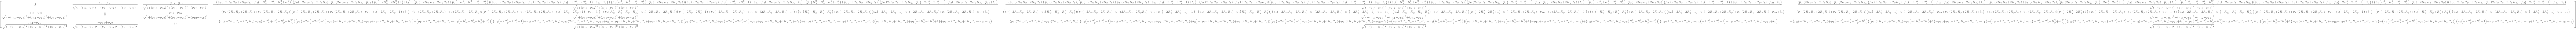

In [47]:
edge_res = edge_residual(t, R, p, p1, p2, sf.epsilon())
Jt = edge_res.jacobian(t)
JR = edge_res.jacobian(R)
#display(edge_res)
#display(Jt)
#display(JR)
display(edge_res.jacobian([t, R]))

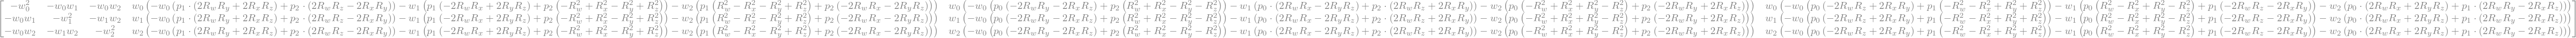

In [44]:
plane_res = plane_residual(t, R, p, w, d, sf.epsilon())
Jt = plane_res.jacobian(t)
JR = plane_res.jacobian(R)
#display(plane_res)
#display(Jt)
#display(JR)
display(plane_res.jacobian([t, R]))

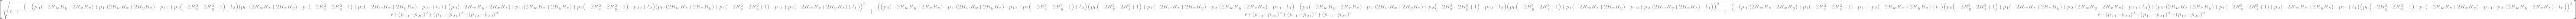

In [10]:
edge_norm_res = edge_norm_residual(t, R, p, p1, p2, sf.epsilon())
Jt = edge_norm_res.jacobian(t)
JR = edge_norm_res.jacobian(R)
display(edge_norm_res)
#display(Jt)
#display(JR)

In [17]:
plane_norm_res = plane_norm_residual(t, R, p, w, d, sf.epsilon())
Jt = plane_norm_res.jacobian(t)
JR = plane_norm_res.jacobian(R)
#display(plane_norm_res)
#display(Jt)
#display(JR)
display(plane_norm_res.jacobian([t, R]))

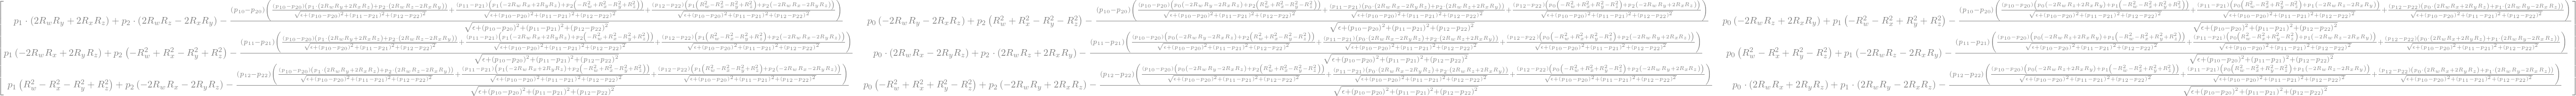

In [54]:
edge_res = edge_residual_better(t, R, p, p1, p2, sf.epsilon())
Jt = edge_res.jacobian(t)
JR = edge_res.jacobian(R)
#display(edge_res)
#display(Jt)
display(JR)
#display(edge_res.jacobian([t, R]))

In [48]:
# EDGE FACTOR
codegen = Codegen.function(edge_residual, config=CppConfig())
codegen_linearization = codegen.with_linearization(which_args=["t", "R"])
metadata = codegen_linearization.generate_function()
print(open(metadata.generated_files[0]).read())

// -----------------------------------------------------------------------------
// This file was autogenerated by symforce from template:
//     function/FUNCTION.h.jinja
// Do NOT modify by hand.
// -----------------------------------------------------------------------------

#pragma once

#include <Eigen/Dense>

#include <sym/rot3.h>

namespace sym {

/**
 * This function was autogenerated from a symbolic function. Do not modify by hand.
 *
 * Symbolic function: edge_residual
 *
 * Args:
 *     t: Matrix31
 *     R: Rot3
 *     p: Matrix31
 *     p1: Matrix31
 *     p2: Matrix31
 *     epsilon: Scalar
 *
 * Outputs:
 *     res: Matrix31
 *     jacobian: (3x6) jacobian of res wrt args t (3), R (3)
 *     hessian: (6x6) Gauss-Newton hessian for args t (3), R (3)
 *     rhs: (6x1) Gauss-Newton rhs for args t (3), R (3)
 */
template <typename Scalar>
void EdgeFactor(const Eigen::Matrix<Scalar, 3, 1>& t, const sym::Rot3<Scalar>& R,
                const Eigen::Matrix<Scalar, 3, 1>& p, c

In [11]:
# EDGE NORM FACTOR
codegen = Codegen.function(edge_norm_residual, config=CppConfig())
codegen_linearization = codegen.with_linearization(which_args=["t", "R"])
metadata = codegen_linearization.generate_function()
print(open(metadata.generated_files[0]).read())

// -----------------------------------------------------------------------------
// This file was autogenerated by symforce from template:
//     function/FUNCTION.h.jinja
// Do NOT modify by hand.
// -----------------------------------------------------------------------------

#pragma once

#include <Eigen/Dense>

#include <sym/rot3.h>

namespace sym {

/**
 * This function was autogenerated from a symbolic function. Do not modify by hand.
 *
 * Symbolic function: edge_norm_residual
 *
 * Args:
 *     t: Matrix31
 *     R: Rot3
 *     p: Matrix31
 *     p1: Matrix31
 *     p2: Matrix31
 *     epsilon: Scalar
 *
 * Outputs:
 *     res: Matrix11
 *     jacobian: (1x6) jacobian of res wrt args t (3), R (3)
 *     hessian: (6x6) Gauss-Newton hessian for args t (3), R (3)
 *     rhs: (6x1) Gauss-Newton rhs for args t (3), R (3)
 */
template <typename Scalar>
void EdgeNormFactor(const Eigen::Matrix<Scalar, 3, 1>& t, const sym::Rot3<Scalar>& R,
                    const Eigen::Matrix<Scalar

In [12]:
# PLANE NORM FACTOR
codegen = Codegen.function(plane_norm_residual, config=CppConfig())
codegen_linearization = codegen.with_linearization(which_args=["t", "R"])
metadata = codegen_linearization.generate_function()
print(open(metadata.generated_files[0]).read())

// -----------------------------------------------------------------------------
// This file was autogenerated by symforce from template:
//     function/FUNCTION.h.jinja
// Do NOT modify by hand.
// -----------------------------------------------------------------------------

#pragma once

#include <Eigen/Dense>

#include <sym/rot3.h>

namespace sym {

/**
 * This function was autogenerated from a symbolic function. Do not modify by hand.
 *
 * Symbolic function: plane_norm_residual
 *
 * Args:
 *     t: Matrix31
 *     R: Rot3
 *     p: Matrix31
 *     w: Matrix31
 *     d: Matrix11
 *     epsilon: Scalar
 *
 * Outputs:
 *     res: Matrix11
 *     jacobian: (1x6) jacobian of res wrt args t (3), R (3)
 *     hessian: (6x6) Gauss-Newton hessian for args t (3), R (3)
 *     rhs: (6x1) Gauss-Newton rhs for args t (3), R (3)
 */
template <typename Scalar>
void PlaneNormFactor(const Eigen::Matrix<Scalar, 3, 1>& t, const sym::Rot3<Scalar>& R,
                     const Eigen::Matrix<Scala

[n0*d0 + n0*(n0*((-2*R_w*R_z + 2*R_x*R_y)*p1 + (2*R_w*R_y + 2*R_x*R_z)*p2 + (1 - 2*R_y**2 - 2*R_z**2)*p0) + n1*((-2*R_x*R_w + 2*R_z*R_y)*p2 + (2*R_w*R_z + 2*R_x*R_y)*p0 + (1 - 2*R_x**2 - 2*R_z**2)*p1) + n2*((2*R_x*R_w + 2*R_z*R_y)*p1 + (-2*R_w*R_y + 2*R_x*R_z)*p0 + (1 - 2*R_x**2 - 2*R_y**2)*p2))]
[n1*d0 + n1*(n0*((-2*R_w*R_z + 2*R_x*R_y)*p1 + (2*R_w*R_y + 2*R_x*R_z)*p2 + (1 - 2*R_y**2 - 2*R_z**2)*p0) + n1*((-2*R_x*R_w + 2*R_z*R_y)*p2 + (2*R_w*R_z + 2*R_x*R_y)*p0 + (1 - 2*R_x**2 - 2*R_z**2)*p1) + n2*((2*R_x*R_w + 2*R_z*R_y)*p1 + (-2*R_w*R_y + 2*R_x*R_z)*p0 + (1 - 2*R_x**2 - 2*R_y**2)*p2))]
[n2*d0 + n2*(n0*((-2*R_w*R_z + 2*R_x*R_y)*p1 + (2*R_w*R_y + 2*R_x*R_z)*p2 + (1 - 2*R_y**2 - 2*R_z**2)*p0) + n1*((-2*R_x*R_w + 2*R_z*R_y)*p2 + (2*R_w*R_z + 2*R_x*R_y)*p0 + (1 - 2*R_x**2 - 2*R_z**2)*p1) + n2*((2*R_x*R_w + 2*R_z*R_y)*p1 + (-2*R_w*R_y + 2*R_x*R_z)*p0 + (1 - 2*R_x**2 - 2*R_y**2)*p2))]



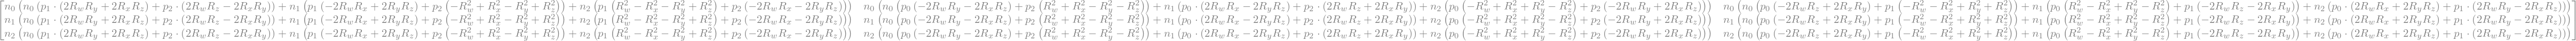

In [69]:
R = sf.Rot3.symbolic("R")
n = sf.M31.symbolic("n")
p = sf.M31.symbolic("p")
d = sf.V1.symbolic("d")
def tmp(
    R: sf.Rot3, n: sf.M31, p: sf.M31, d: sf.V1, epsilon: sf.Scalar) -> sf.V3:
    p_w = R * p
    return (n.transpose()*p_w)[0]*n + d[0]*n
x = tmp(R, n, p, d, sf.epsilon())
print(x)
JR = x.jacobian(R)
display(JR)